In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from datetime import datetime

In [116]:
finance_dataset = pd.read_csv('/content/fraud_payment_data_JPMorgan.csv')
finance_dataset = pd.DataFrame(finance_dataset)

In [117]:
finance_dataset.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


In [118]:
finance_dataset.shape

(1498177, 13)

**Data Pre-Processing**

In [119]:
finance_dataset.isnull().sum()

Time_step                0
Transaction_Id           0
Sender_Id           218886
Sender_Account      218886
Sender_Country      218886
Sender_Sector       218886
Sender_lob          218886
Bene_Id             215893
Bene_Account        215893
Bene_Country        215893
USD_amount               0
Label                    0
Transaction_Type         0
dtype: int64

In [120]:
## drop null values

finance_dataset = finance_dataset.dropna()
finance_dataset = finance_dataset.reset_index(drop = True)


In [121]:
finance_dataset.isnull().sum()

Time_step           0
Transaction_Id      0
Sender_Id           0
Sender_Account      0
Sender_Country      0
Sender_Sector       0
Sender_lob          0
Bene_Id             0
Bene_Account        0
Bene_Country        0
USD_amount          0
Label               0
Transaction_Type    0
dtype: int64

In [122]:
finance_dataset.shape

(1063398, 13)

In [123]:
finance_dataset.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
1,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
2,2022-03-15 10:24:00,PAY-CHECK-9780,JPMC-CLIENT-9763,ACCOUNT-9773,USA,14645.0,CCB,JPMC-COMPANY-9765,ACCOUNT-9771,BELARUS,543.87,0,PAY-CHECK
3,2022-03-15 10:24:00,MAKE-PAYMENT-9501,CLIENT-9502,ACCOUNT-9503,ANGUILLA,25040.0,CCB,JPMC-CLIENT-9483,ACCOUNT-9494,USA,336.55,0,MAKE-PAYMENT
4,2022-03-15 10:24:00,QUICK-PAYMENT-9249,JPMC-CLIENT-9229,ACCOUNT-9239,USA,34576.0,CCB,COMPANY-9231,ACCOUNT-9237,QATAR,265.66,0,QUICK-PAYMENT


In [124]:
## Time_step is already arranged sequentially, so we set an initial off-set of zero for the first transaction
def difference_in_seconds(start_date, end_date):
    # Parse the start and end dates
    start_datetime = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
    end_datetime = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

    # Calculate the difference in seconds
    difference = (end_datetime - start_datetime).total_seconds()

    return difference

start_date = finance_dataset['Time_step'][0]
cntr = 0
for i in range(len(finance_dataset.index)):
  end_date = finance_dataset['Time_step'][i]
  finance_dataset.iloc[i, 0] = difference_in_seconds(start_date, end_date)
  cntr += 1
  print(cntr)



Streaming output truncated to the last 5000 lines.
1058399
1058400
1058401
1058402
1058403
1058404
1058405
1058406
1058407
1058408
1058409
1058410
1058411
1058412
1058413
1058414
1058415
1058416
1058417
1058418
1058419
1058420
1058421
1058422
1058423
1058424
1058425
1058426
1058427
1058428
1058429
1058430
1058431
1058432
1058433
1058434
1058435
1058436
1058437
1058438
1058439
1058440
1058441
1058442
1058443
1058444
1058445
1058446
1058447
1058448
1058449
1058450
1058451
1058452
1058453
1058454
1058455
1058456
1058457
1058458
1058459
1058460
1058461
1058462
1058463
1058464
1058465
1058466
1058467
1058468
1058469
1058470
1058471
1058472
1058473
1058474
1058475
1058476
1058477
1058478
1058479
1058480
1058481
1058482
1058483
1058484
1058485
1058486
1058487
1058488
1058489
1058490
1058491
1058492
1058493
1058494
1058495
1058496
1058497
1058498
1058499
1058500
1058501
1058502
1058503
1058504
1058505
1058506
1058507
1058508
1058509
1058510
1058511
1058512
1058513
1058514
1058515
1058516
10585

In [131]:
finance_dataset.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,0.0,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
1,0.0,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
2,0.0,PAY-CHECK-9780,JPMC-CLIENT-9763,ACCOUNT-9773,USA,14645.0,CCB,JPMC-COMPANY-9765,ACCOUNT-9771,BELARUS,543.87,0,PAY-CHECK
3,0.0,MAKE-PAYMENT-9501,CLIENT-9502,ACCOUNT-9503,ANGUILLA,25040.0,CCB,JPMC-CLIENT-9483,ACCOUNT-9494,USA,336.55,0,MAKE-PAYMENT
4,0.0,QUICK-PAYMENT-9249,JPMC-CLIENT-9229,ACCOUNT-9239,USA,34576.0,CCB,COMPANY-9231,ACCOUNT-9237,QATAR,265.66,0,QUICK-PAYMENT


In [132]:
finance_dataset['Sender_Id'].value_counts()

Sender_Id
JPMC-CLIENT-303611      132
JPMC-CLIENT-437630      132
JPMC-CLIENT-1988600     130
JPMC-CLIENT-708453      130
JPMC-CLIENT-223769      129
                       ... 
BILL-COMPANY-1124299      1
JPMC-COMPANY-1130336      1
BILL-COMPANY-1125423      1
BILL-COMPANY-1129134      1
BILL-COMPANY-2178781      1
Name: count, Length: 58423, dtype: int64

**Data Visulaizations**

<Axes: xlabel='Transaction_Type', ylabel='count'>

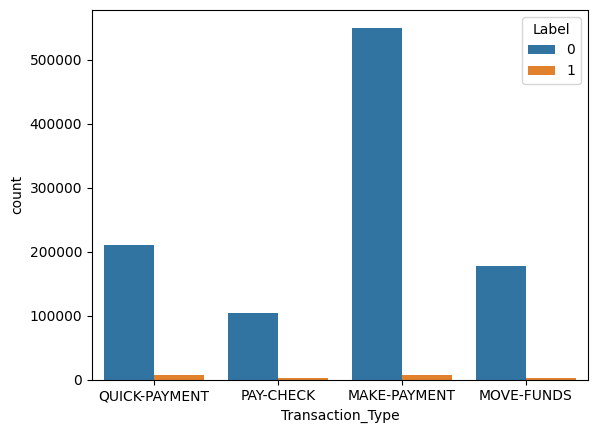

In [136]:
## 0 shows that a particular transaction is not Fraud
## 1 shows that a particular transaction is Fraud one
sns.countplot(x = 'Transaction_Type', hue = 'Label', data = finance_dataset)

In [152]:
# Filter the DataFrame to include only fraudulent transactions (where Label == 1)
fraudulent_transactions = finance_dataset[finance_dataset['Label'] == 1]

# Group by 'Sender_Country' and count the occurrences of fraudulent transactions in each country
country_fraud_counts = fraudulent_transactions.groupby('Sender_Country').size()

# Get the top 3 counts of 'Sender_Country'
top_3_countries = country_fraud_counts.nlargest(3)
top_3_countries

Sender_Country
USA            16691
CANADA           946
GERMANY           49
SOUTH-SUDAN       38
dtype: int64

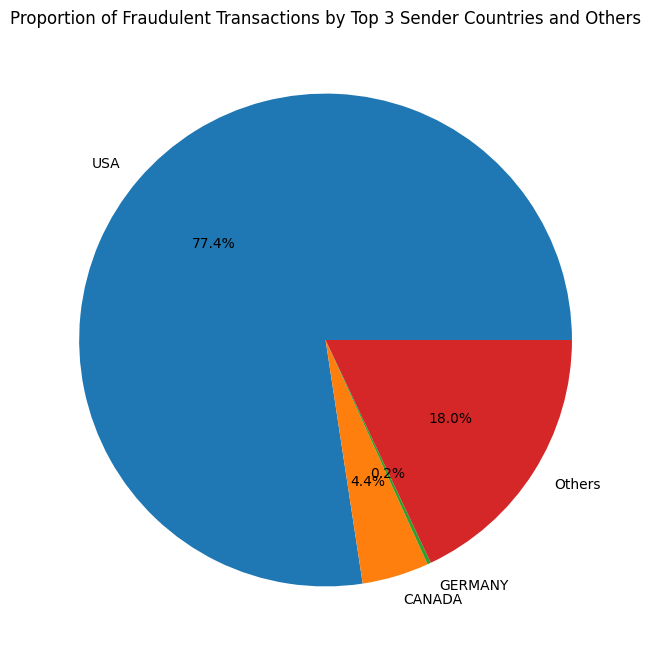

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# finance_dataset = pd.read_csv('your_data.csv')

# Filter the DataFrame to include only fraudulent transactions (where Label == 1)
fraudulent_transactions = finance_dataset[finance_dataset['Label'] == 1]

# Group by 'Sender_Country' and count the occurrences of fraudulent transactions in each country
country_fraud_counts = fraudulent_transactions.groupby('Sender_Country').size()

# Get the top 3 countries with the highest counts of fraudulent transactions
top_3_countries = country_fraud_counts.nlargest(3)

# Calculate the total count of fraudulent transactions for all other countries
others_count = country_fraud_counts.sum() - top_3_countries.sum()

# Create a new DataFrame with the top 3 countries and the "Others" category
data = pd.concat([top_3_countries, pd.Series(others_count, index=['Others'])])

# Plot a pie chart with the top 3 countries and "Others" category
plt.figure(figsize=(10, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')

# Set the title
plt.title('Proportion of Fraudulent Transactions by Top 3 Sender Countries and Others')

# Display the pie chart
plt.show()


In [156]:
# Filter the DataFrame to include only fraudulent transactions (where Label == 1)
fraudulent_transactions = finance_dataset[finance_dataset['Label'] == 1]

# Group by 'Sender_Country' and count the occurrences of fraudulent transactions in each country
country_fraud_counts = fraudulent_transactions.groupby('Bene_Country').size()

# Get the top 3 counts of 'Sender_Country'
top_3_countries = country_fraud_counts.nlargest(3)
top_3_countries

Bene_Country
USA        12267
CANADA      1533
GERMANY      226
dtype: int64

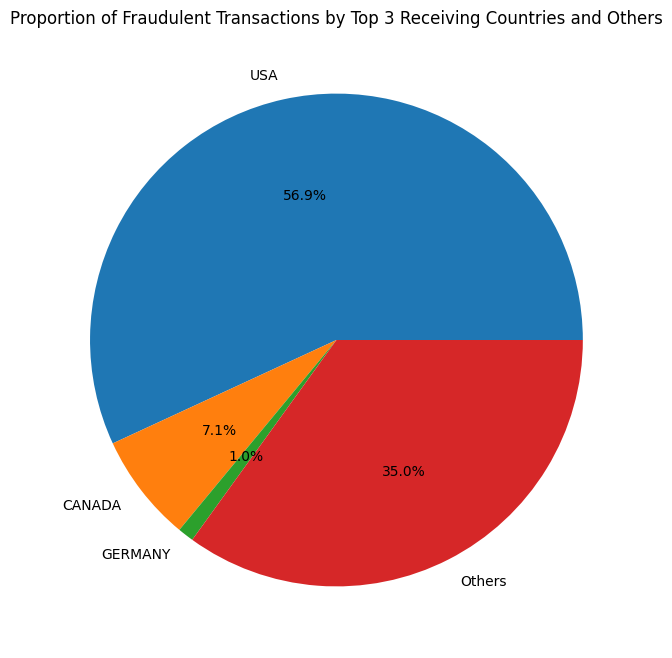

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# finance_dataset = pd.read_csv('your_data.csv')

# Filter the DataFrame to include only fraudulent transactions (where Label == 1)
fraudulent_transactions = finance_dataset[finance_dataset['Label'] == 1]

# Group by 'Sender_Country' and count the occurrences of fraudulent transactions in each country
country_fraud_counts = fraudulent_transactions.groupby('Bene_Country').size()

# Get the top 3 countries with the highest counts of fraudulent transactions
top_3_countries = country_fraud_counts.nlargest(3)

# Calculate the total count of fraudulent transactions for all other countries
others_count = country_fraud_counts.sum() - top_3_countries.sum()

# Create a new DataFrame with the top 3 countries and the "Others" category
data = pd.concat([top_3_countries, pd.Series(others_count, index=['Others'])])

# Plot a pie chart with the top 3 countries and "Others" category
plt.figure(figsize=(10, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')

# Set the title
plt.title('Proportion of Fraudulent Transactions by Top 3 Receiving Countries and Others')

# Display the pie chart
plt.show()

**simputation**

In [191]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data with multiple categorical columns
data = {
    'Category1': [1, 1,1,1,1,1,1,1,1],
    'Category2': ['X', 'Y', 'Z', 'X', 'Y', 'Z', 'Z', 'Y', 'T'],
    'Category3': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Green', 'Red', 'Yellow']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize a dictionary to store the encoders
encoders = {}

# Loop through each column that needs encoding
for column in df.columns:
    print(type(column))
    # Create a LabelEncoder for the column
    encoder = LabelEncoder()
    # Fit and transform the data using LabelEncoder
    df[column] = encoder.fit_transform(df[column])
    # Store the encoder in the dictionary for future use (if needed)
    encoders[column] = encoder

# Print the DataFrame with the encoded columns
df

# Access the encoders for any future use (if needed)
# For example, you can access the encoder for 'Category1' as follows:
# category1_encoder = encoders['Category1']


<class 'str'>
<class 'str'>
<class 'str'>


,Category1,Category2,Category3
0,0,1,2
1,0,2,0
2,0,3,1
3,0,1,2
4,0,2,0
5,0,3,1
6,0,3,1
7,0,2,2
8,0,0,3


In [ ]:
# Make a chart for these categorical counts for each column

In [186]:
# Group by 'Sender_Country' and count the occurrences of fraudulent transactions in each country
fraud_counts = finance_dataset.groupby('Sender_Id').size()
print(len(fraud_counts))


Categorical values in Sender_Id : 
58423


In [174]:
fraud_counts = finance_dataset.groupby('Sender_Account').size()
print(len(fraud_counts))

73999


In [187]:
fraud_counts = finance_dataset.groupby('Sender_Sector').size()
print(len(fraud_counts))

50000


In [176]:
fraud_counts = finance_dataset.groupby('Sender_Country').size()
print(len(fraud_counts))

252


In [177]:
fraud_counts = finance_dataset.groupby('Sender_lob').size()
print(len(fraud_counts))

1


In [179]:
fraud_counts = finance_dataset.groupby('Bene_Id').size()
print(len(fraud_counts))

278084


In [182]:
fraud_counts = finance_dataset.groupby('Bene_Country').size()
print(len(fraud_counts))

252


In [183]:
fraud_counts = finance_dataset.groupby('Transaction_Type').size()
print(len(fraud_counts))

4


In [193]:
from sklearn.preprocessing import LabelEncoder
column_list = ['Sender_Id', 'Sender_Account', 'Sender_Country', 'Sender_Sector','Sender_lob', 'Bene_Id', 'Bene_Account', 'Bene_Country', 'Transaction_Type']

encoders = {}

# Loop through each column that needs encoding
for column in column_list:
    # Create a LabelEncoder for the column
    encoder = LabelEncoder()
    # Fit and transform the data using LabelEncoder
    finance_dataset[column] = encoder.fit_transform(finance_dataset[column])
    # Store the encoder in the dictionary for future use (if needed)
    encoders[column] = encoder

# Print the DataFrame with the encoded columns
finance_dataset

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,0.0,QUICK-PAYMENT-10116,42189,411,239,15287,0,215452,1591,40,622.78,0,3
1,0.0,PAY-CHECK-9832,52848,73335,239,38145,0,267754,290586,239,989.09,0,2
2,0.0,PAY-CHECK-9780,52827,73143,239,14645,0,277976,289792,20,543.87,0,2
3,0.0,MAKE-PAYMENT-9501,28864,72146,7,25040,0,267558,285667,239,336.55,0,0
4,0.0,QUICK-PAYMENT-9249,52546,71186,239,34576,0,254620,281833,179,265.66,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063393,1025664804.0,PAY-BILL-2180018,48623,44443,239,24701,0,129010,175740,239,159.64,0,0
1063394,1025706804.0,QUICK-PAYMENT-2181421,48632,44497,239,4953,0,225175,175951,239,120.07,0,3
1063395,1025708004.0,PAYMENT-2180021,48623,44443,239,34784,0,129024,175755,239,25.32,0,0
1063396,1025750004.0,QUICK-PAYMENT-2181422,48632,44497,239,23822,0,225175,175951,239,610.91,0,3


In [194]:
## Incase if we want to retrive back the information from the encoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data with a categorical column
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'C']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a LabelEncoder and fit it to the data
encoder = LabelEncoder()
df['Category_encoded'] = encoder.fit_transform(df['Category'])

# Retrieve the mapping of categories to labels
mapping = list(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping from categories to labels:", mapping)

# Convert encoded values back to the original categorical values
original_values = encoder.inverse_transform(df['Category_encoded'])
print("Original values from encoded values:", original_values)

# Add the original values as a new column in the DataFrame
df['Category_decoded'] = original_values

# Print the DataFrame
print(df)


In [196]:
## Drop Transaction_Id column since it's unique and will not be of any use in the process of model training
finance_dataset = finance_dataset.drop(columns = ['Transaction_Id'], axis = 1)
finance_dataset

,Time_step,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,0.0,42189,411,239,15287,0,215452,1591,40,622.78,0,3
1,0.0,52848,73335,239,38145,0,267754,290586,239,989.09,0,2
2,0.0,52827,73143,239,14645,0,277976,289792,20,543.87,0,2
3,0.0,28864,72146,7,25040,0,267558,285667,239,336.55,0,0
4,0.0,52546,71186,239,34576,0,254620,281833,179,265.66,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1063393,1025664804.0,48623,44443,239,24701,0,129010,175740,239,159.64,0,0
1063394,1025706804.0,48632,44497,239,4953,0,225175,175951,239,120.07,0,3
1063395,1025708004.0,48623,44443,239,34784,0,129024,175755,239,25.32,0,0
1063396,1025750004.0,48632,44497,239,23822,0,225175,175951,239,610.91,0,3


In [199]:
## Separating the data and the label
X = finance_dataset.drop(columns = ['Label'],axis = 1)
Y = finance_dataset['Label']

In [209]:
X

,Time_step,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Transaction_Type
0,0.0,42189,411,239,15287,0,215452,1591,40,622.78,3
1,0.0,52848,73335,239,38145,0,267754,290586,239,989.09,2
2,0.0,52827,73143,239,14645,0,277976,289792,20,543.87,2
3,0.0,28864,72146,7,25040,0,267558,285667,239,336.55,0
4,0.0,52546,71186,239,34576,0,254620,281833,179,265.66,3
...,...,...,...,...,...,...,...,...,...,...,...
1063393,1025664804.0,48623,44443,239,24701,0,129010,175740,239,159.64,0
1063394,1025706804.0,48632,44497,239,4953,0,225175,175951,239,120.07,3
1063395,1025708004.0,48623,44443,239,34784,0,129024,175755,239,25.32,0
1063396,1025750004.0,48632,44497,239,23822,0,225175,175951,239,610.91,3


In [205]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
1063393    0
1063394    0
1063395    0
1063396    0
1063397    0
Name: Label, Length: 1063398, dtype: int64

**Train-Test Split**

In [206]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [207]:
print(X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape)

(957058, 11) (957058,) (106340, 11) (106340,)
